In [1]:
import pandas as pd
import numpy as np
from datetime import datetime as dt,date
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
from kiblib.utils.db import DbConn
from kiblib.utils import lucas_sns_params
import warnings
warnings.filterwarnings("ignore")


In [2]:
maj = dt.today().strftime('%d-%m-%Y à %Hh%M' )
print(f"Dernière mise à jour le {maj}")

Dernière mise à jour le 09-01-2024 à 09h54


In [3]:
db_conn = DbConn().create_engine()

In [4]:
query= """SELECT reservedate,borrowernumber
FROM statdb.stat_reserves sr 
WHERE YEAR(reservedate) >= '2019'"""

In [5]:
#query= """SELECT reservedate AS 'date',borrowernumber
#FROM statdb.stat_reserves sr 
#WHERE YEAR(reservedate) >= '2019'"""

In [6]:
resas = pd.read_sql(query,db_conn)

In [7]:
from kiblib.utils.evolution_stats import EvolutionActivite
from kiblib.utils import lucas_sns_params

In [8]:
df = EvolutionActivite(df=resas,df_subject='resas_lagrandplage',text='réservations')

In [9]:
df.add_columns()

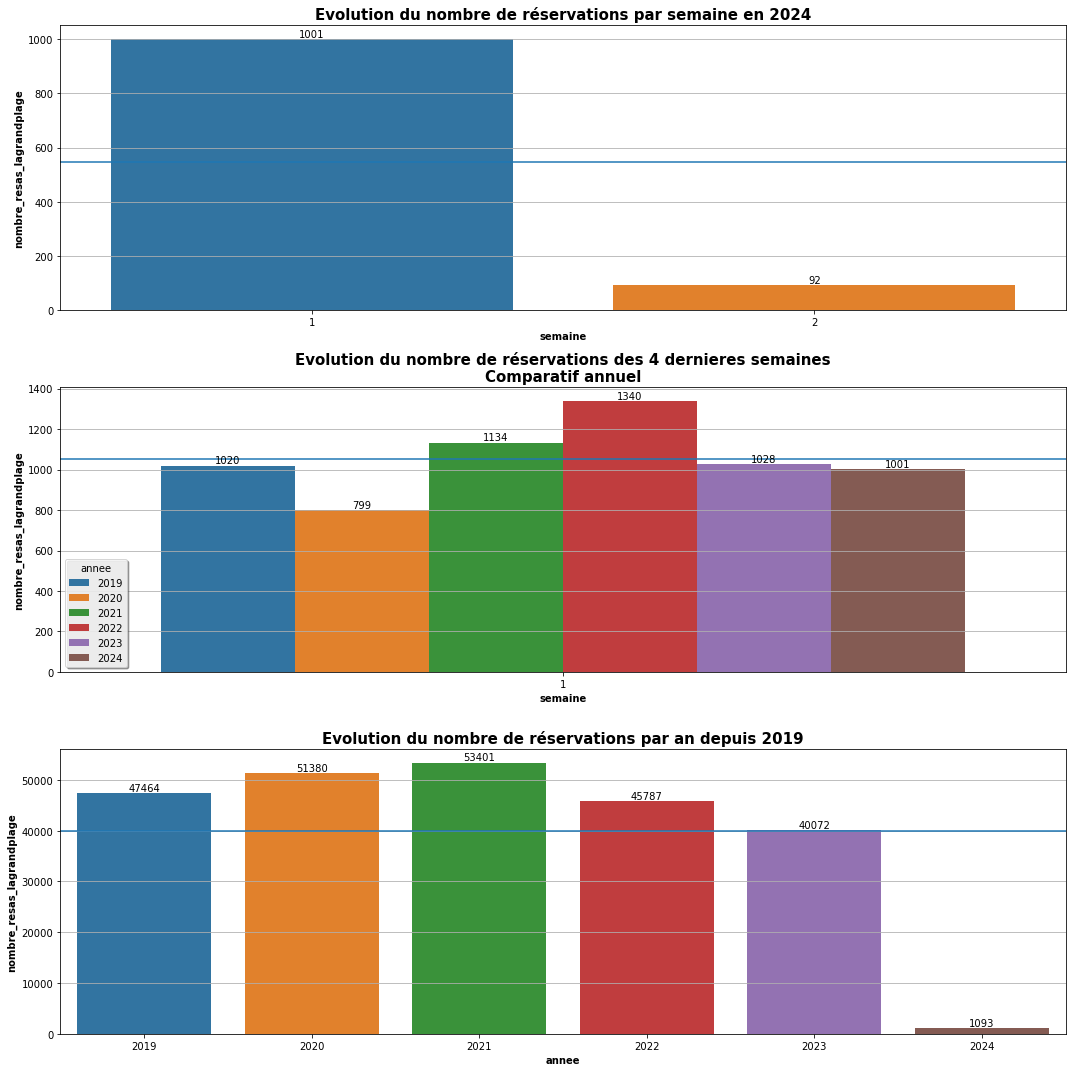

In [10]:
df1 = df.evolution_byweek_thisyear()
df2 = df.evolution_4lastweek()
df3 = df.evolution_by_year()
df4 = df.distinct_evolution_byweek_thisyear()
df5 = df.distinct_evolution_4lastweek()
df6 = df.distinct_evolution_by_year()

f,ax = plt.subplots(nrows=3,ncols=1,figsize=(15,15))
#1er graphique
sns.barplot(data=df.evolution_byweek_thisyear(),x='semaine',y='nombre_resas_lagrandplage',ax=ax[0])
ax[0].axhline(y=df1["nombre_resas_lagrandplage"].mean())
ax[0].set_title(df.titre_graph1())
for i in ax[0].containers:
    ax[0].bar_label(i,)
#2e graphique
sns.barplot(data=df.evolution_4lastweek(),x='semaine',y='nombre_resas_lagrandplage',hue='annee',ax=ax[1])
ax[1].axhline(y=df2["nombre_resas_lagrandplage"].mean())
ax[1].set_title(df.titre_graph2())
for i in ax[1].containers:
    ax[1].bar_label(i,)
    
sns.barplot(data=df.evolution_by_year(),x='annee',y='nombre_resas_lagrandplage',ax=ax[2])
ax[2].axhline(y=df3['nombre_resas_lagrandplage'].mean())
ax[2].set_title(df.titre_graph3())
for i in ax[2].containers:
    ax[2].bar_label(i,)

f.tight_layout()

# Nombre d'usagers distincts utilisant le service de réservations

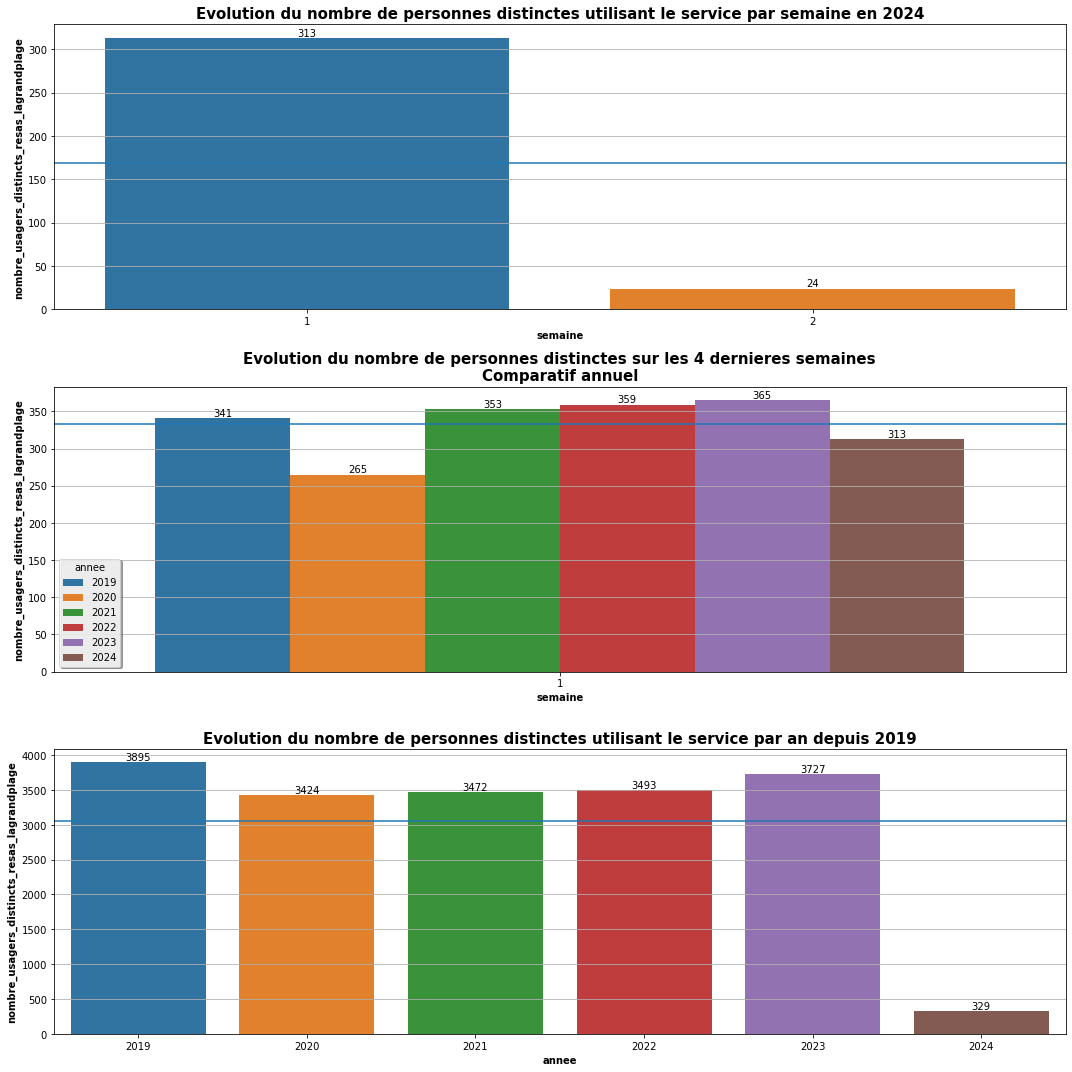

In [11]:
f,ax = plt.subplots(nrows=3,ncols=1,figsize=(15,15))

sns.barplot(data=df.distinct_evolution_byweek_thisyear(),x='semaine',y='nombre_usagers_distincts_resas_lagrandplage',ax=ax[0])
ax[0].axhline(y=df4["nombre_usagers_distincts_resas_lagrandplage"].mean())
ax[0].set_title(df.titre_graph4())
for i in ax[0].containers:
    ax[0].bar_label(i,)

sns.barplot(data=df.distinct_evolution_4lastweek(),x='semaine',y='nombre_usagers_distincts_resas_lagrandplage',hue='annee',ax=ax[1])
ax[1].axhline(y=df5["nombre_usagers_distincts_resas_lagrandplage"].mean())
ax[1].set_title(df.titre_graph5())
for i in ax[1].containers:
    ax[1].bar_label(i,)
    
sns.barplot(data=df.distinct_evolution_by_year(),x='annee',y='nombre_usagers_distincts_resas_lagrandplage',ax=ax[2])
ax[2].axhline(y=df6["nombre_usagers_distincts_resas_lagrandplage"].mean())
ax[2].set_title(df.titre_graph6())
for i in ax[2].containers:
    ax[2].bar_label(i,)

f.tight_layout()